<a href="https://colab.research.google.com/github/Jcnok/Stack_Labs_Churn/blob/main/Analise_churn_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Churn for Bank Cusomers**
 

  
**Os dados foram obtidos daqui:**[Predicting Churn for Bank Customers](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers)

![img](https://img.freepik.com/vetores-gratis/ilustracao-da-metrica-de-marketing-de-taxa-de-churn_614220-84.jpg?w=740)

## **Problema:**
Saber por que um cliente abandona ou deixa de comprar seu produto é fundamental para garantir um crescimento sustentável a longo prazo, além disso é muito menos custoso para a empresa reter um cliente do que prospectar novos.
Os departamentos de marketing, vendas e retenção precisam garantir a satisfação dos clientes, fornecer incentivos e apresentar ofertas no momento certo para reduzir a rotatividade.
Esse projeto de Machine Learning visa ajudar as equipes de marketing, vendas e retenção de clientes a determinar o momento certo para fazer uma oferta e assim minimizar o abandono dos clientes.

### Alguns motivos importantes para evitar o churn:
*	É mais caro prospectar novos cliente do que mantê-los.
*	Caso o cliente saia da instituição, a chance de retorno é muito pequena.
*	Clientes que deixam a instituição não costumam recomendá-la.



## **Sobre os Dados**

### O conjunto de dados é composto pelas seguintes variáveis:
* **RowNumber**:número de linhas.
* **CustomerId**: número de identificação.
* **Surname**: Sobrenome.
* **CreditScore**:A classificação do cliente no Banco.
* **Geography**:País.
* **Gender**:Sexo.
* **Age**:Idade.
* **Tenure**:Tempo de permanência.
* **Balance**:Saldo em conta.
* **NumOfProducts**:Quantidade de produtos que o cliente possui com o banco.
* **HasCrCard**:Cliente possui cartão de crédito? "0 = Não Possui" e "1 = Possui".
* **IsActiveMember**:Cliente é membro ativo? "0 = Não" e "1 = Sim".
* **EstimatedSalary**:Salário estimado.
* **Exited**:Saiu? "0 = Não" e "1 = Sim".


### Algumas dúvidas e problemas que surgiram sobre a base de dados:

* Não temos data e, portanto, não tempos uma informação mais sucinta sobre o Saldo (Balance), pois o cliente pode receber seu salário em um dia e remove da conta em outro, não sabemos também a origem do Saldo se é todo o capital, saldo em CC, aplicações etc.
* Qual o significado de membro ativo? Um cliente que não movimentou por x período? Não há como mensurar.


In [1]:
#importando as libs para a análise.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import missingno as missing
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Carregando os dados
df = pd.read_csv('https://raw.githubusercontent.com/Jcnok/Stack_Labs_Churn/main/Data/Churn_Modelling.csv')

In [3]:
# as 5 primeiras linhas.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Análise Exploratória dos Dados** 

In [4]:
# Exibindo os valores que são únicos de cada feature.
print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))

Valores únicos (por coluna):
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64



* **Alterando os tipos de dados para reduzir o uso de recursos computacionais.**

In [ ]:
# informação do tipo, tamnanho e dados nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Convertendo os dados tipo categóricos
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
#exceção para o dado categórico Exited que será convertido em int64
df['Exited'] = df['Exited'].astype('int64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(4), float64(2), int64(7), object(1)
memory usage: 820.9+ KB


* **Conseguimos reduzir o tamanho dos dados de 1.1Mb para 820KB.**
* **Vamos reduzir ainda mais ao remover as colunas RowNumber, CustomerId e Surname que aparentemente não são relevantes.** 

In [7]:
#Descarte de variáveis que aparentemente não são importantes
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 586.6 KB



* **Parece pouco, mas imaginem em um ambiente de produção com uma base na casa dos Terabytes, reduzir o tamanho do conjunto pela metade, certamente trará muitos benefícios, como redução de recursos computacionais e velocidade no processamento.**
* **Agora podemos seguir a análise.**



CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

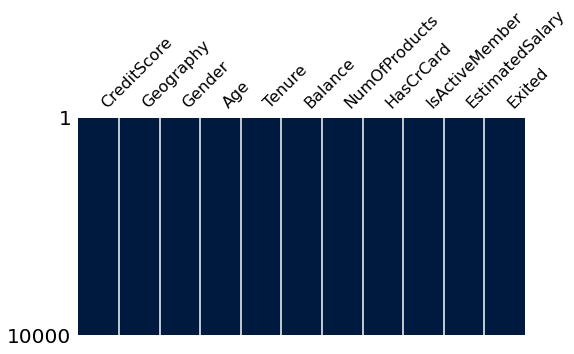

In [8]:
# Conferindo se existem dados faltantes.
missing.matrix(df, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);
df.isnull().sum()

In [9]:
!pip install sweetviz -q

     |████████████████████████████████| 15.1 MB 367 kB/s 


                                             |          | [  0%]   00:00 -> (? left)


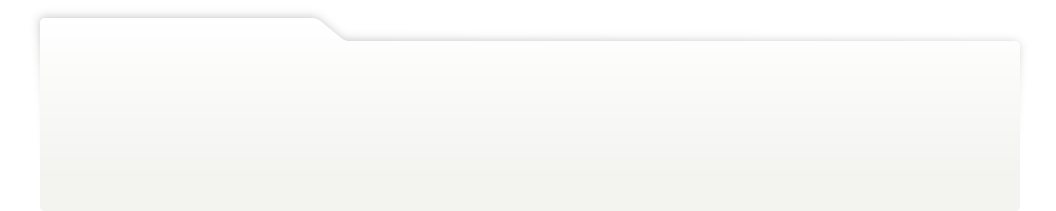
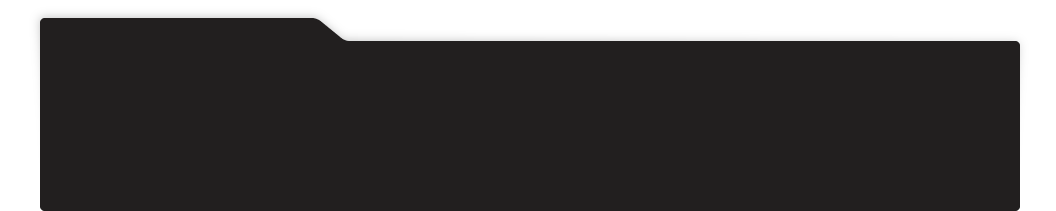
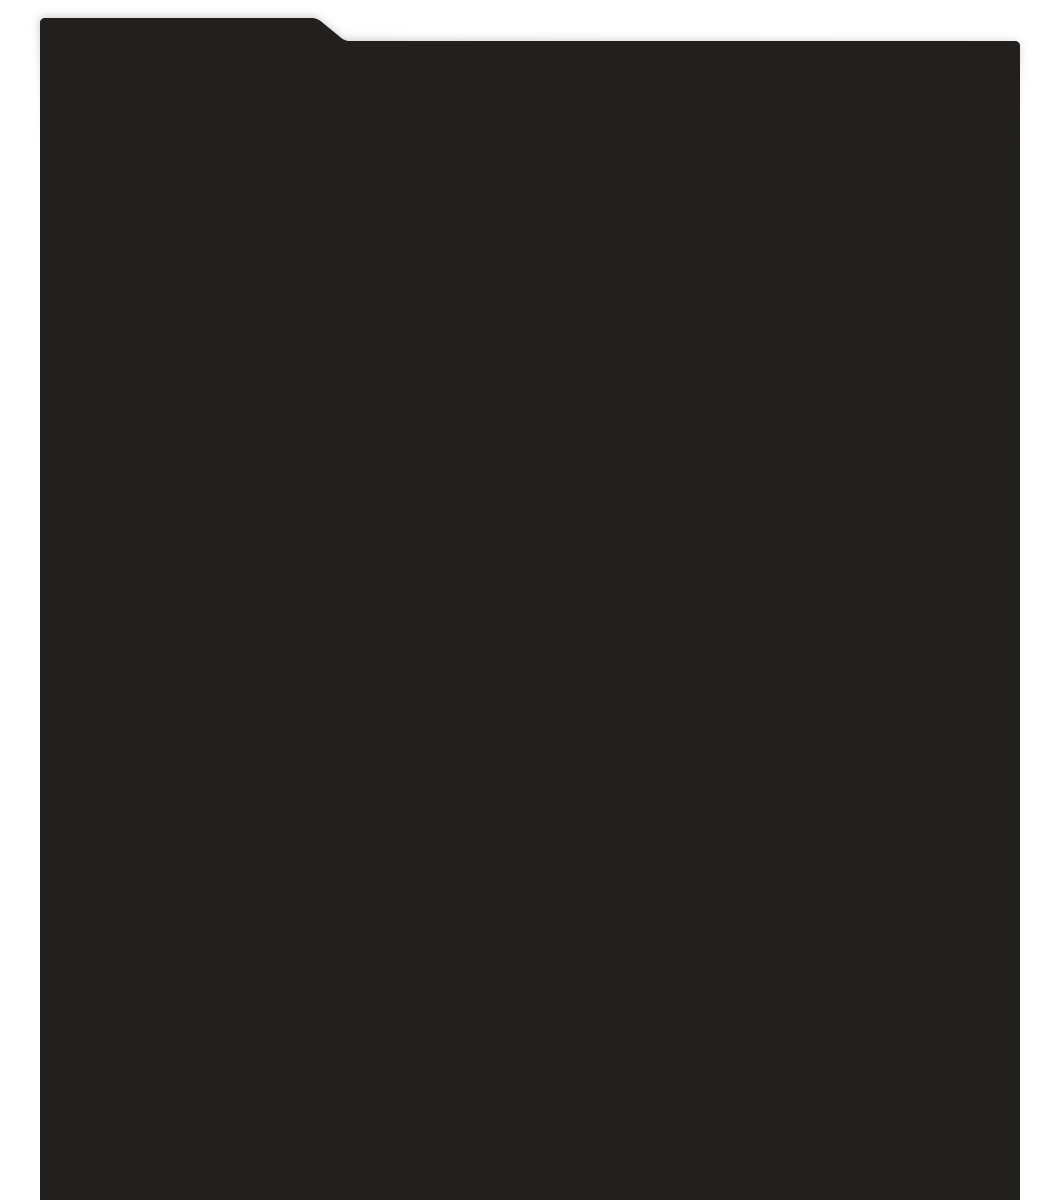
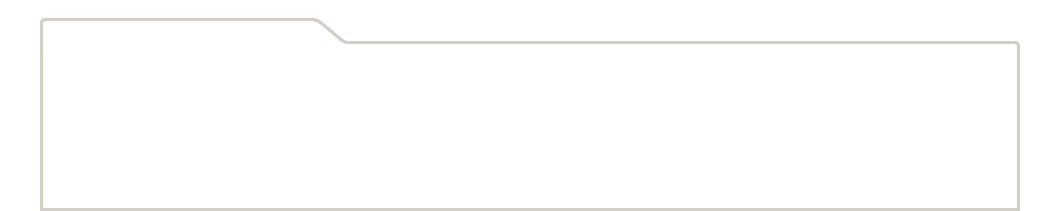
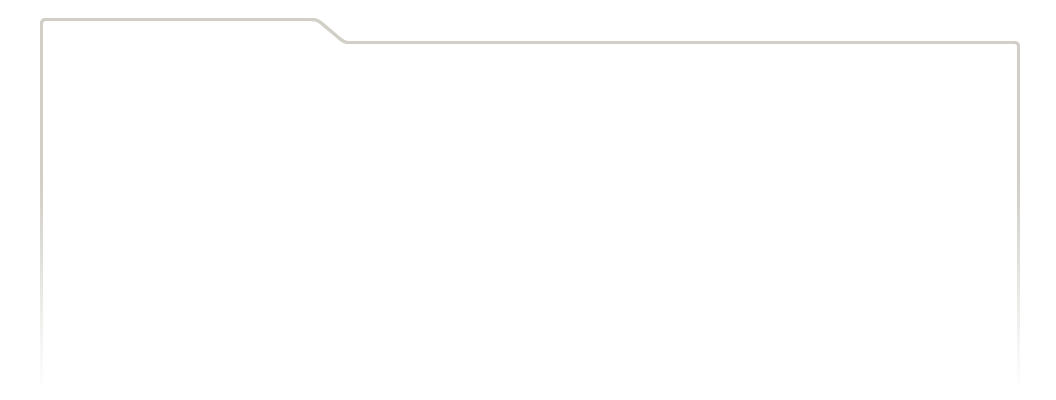
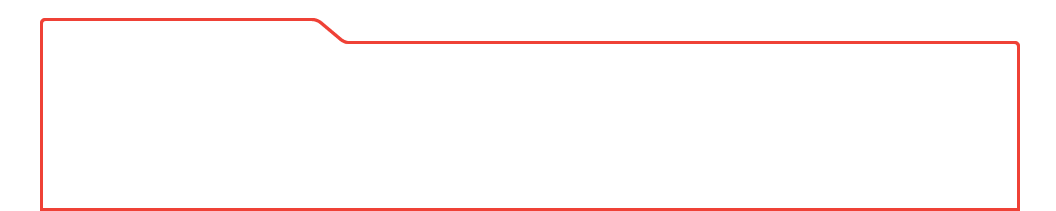
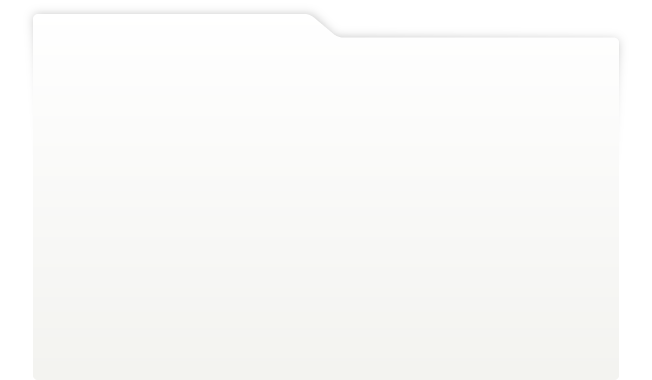
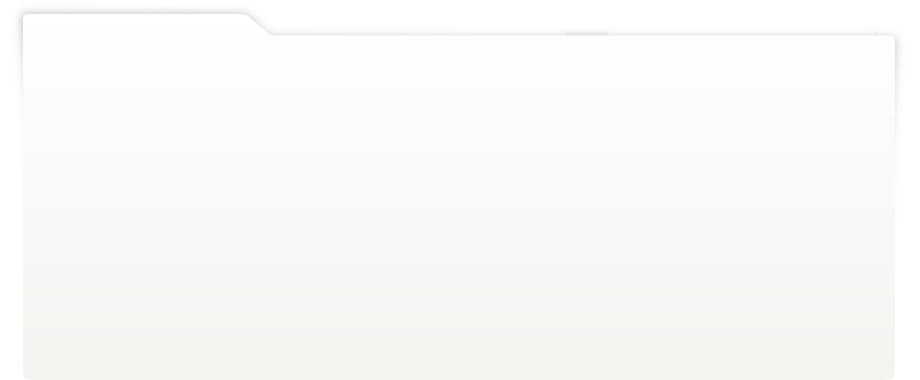
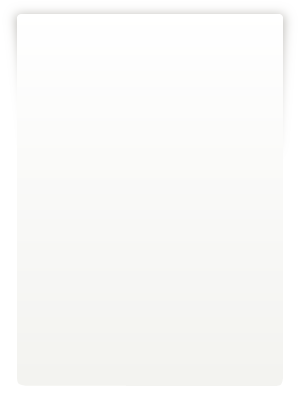
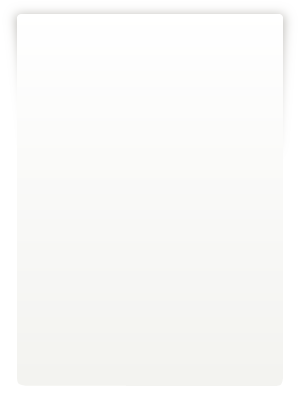
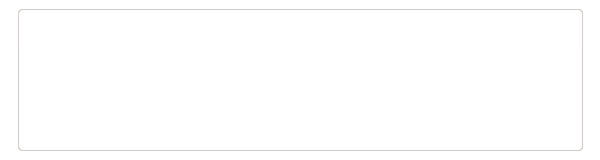
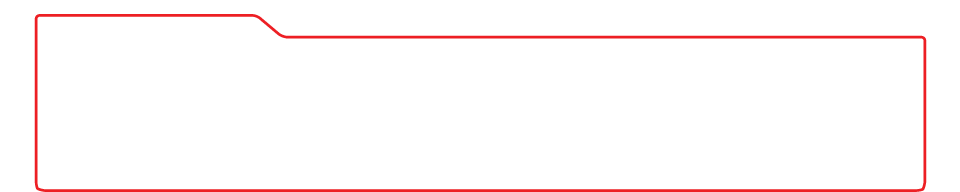
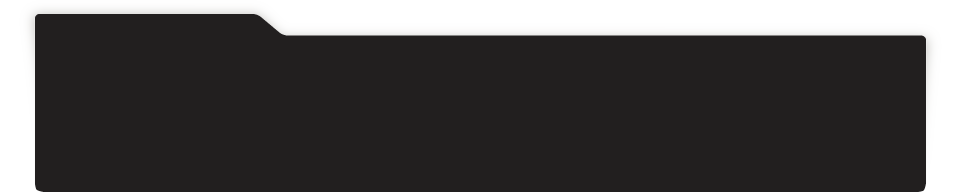
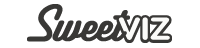
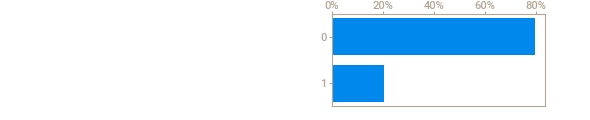
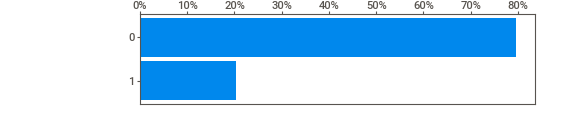
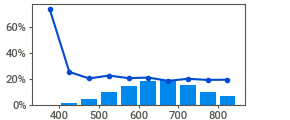
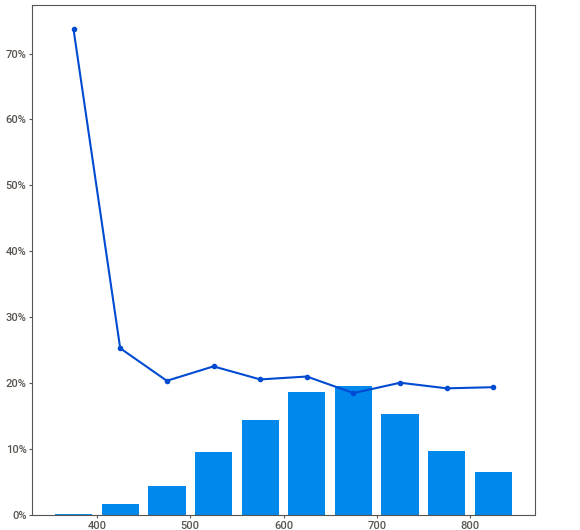
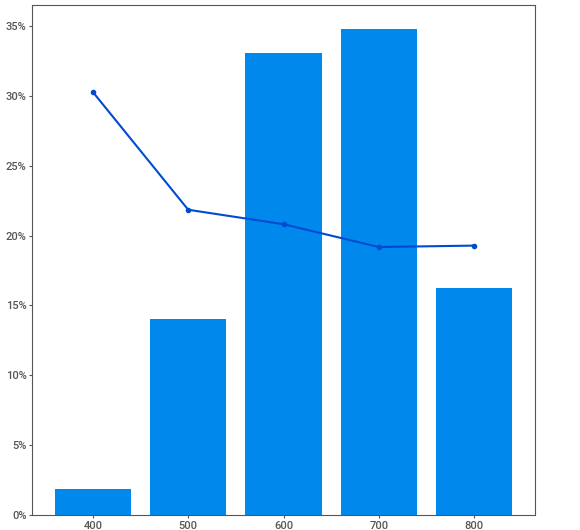
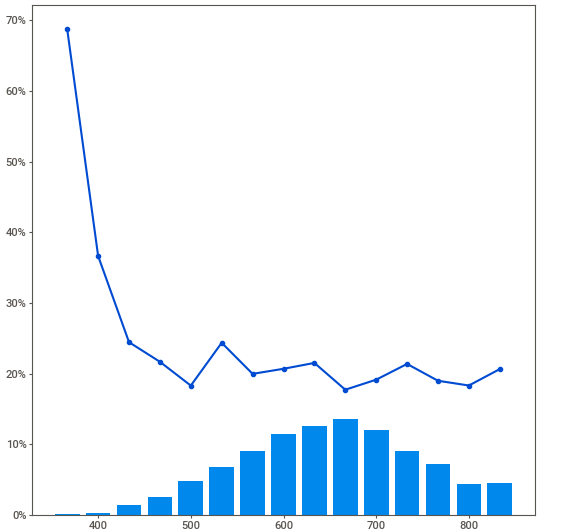
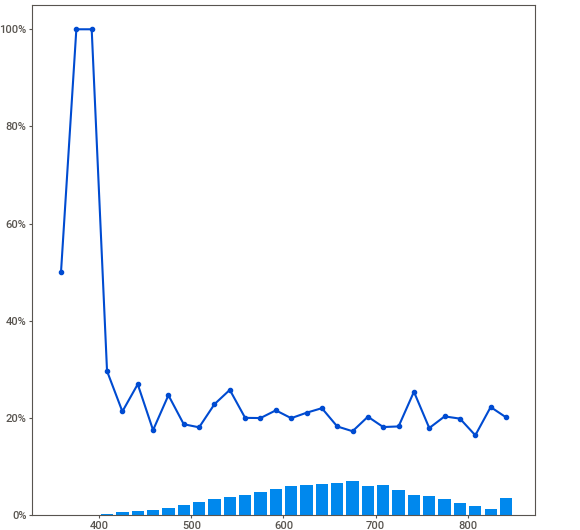
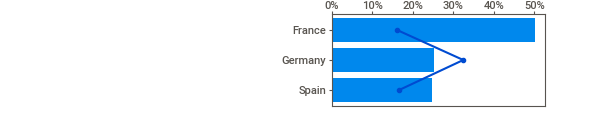
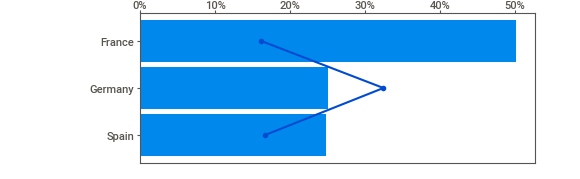
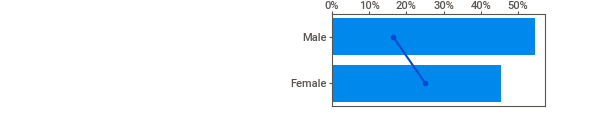
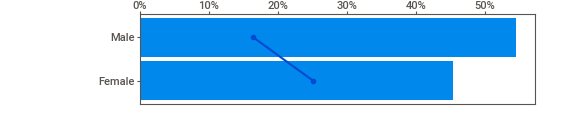
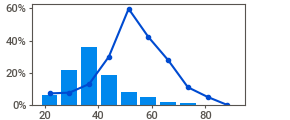
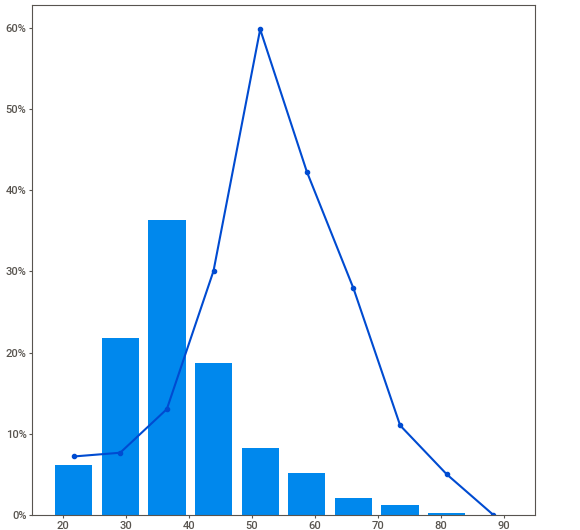
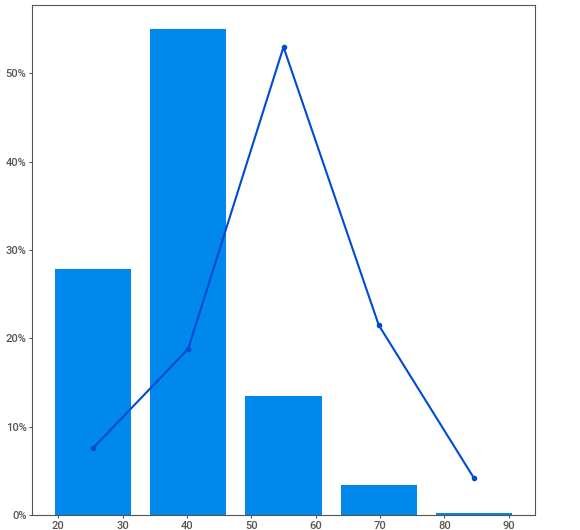
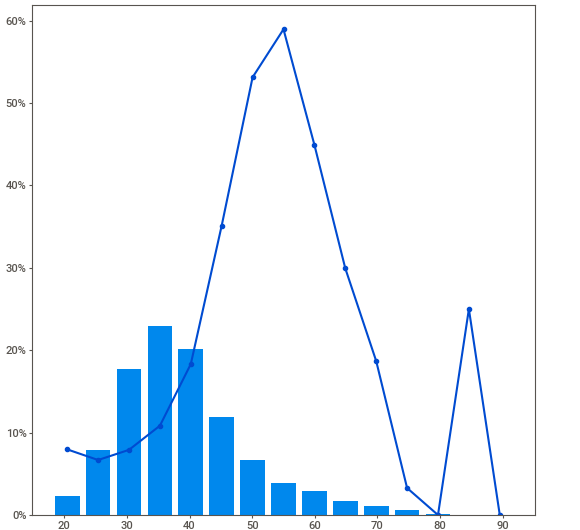
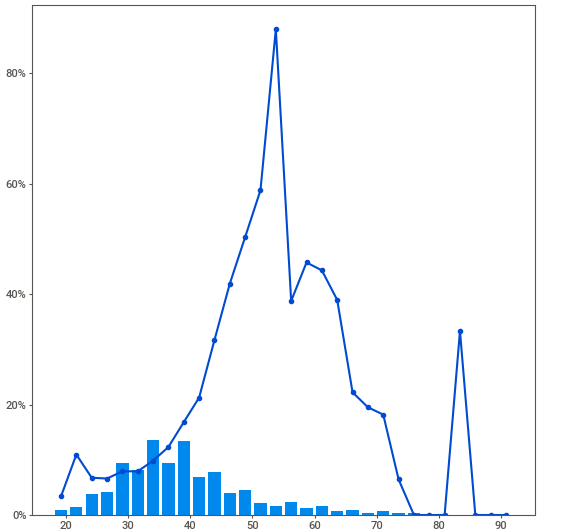
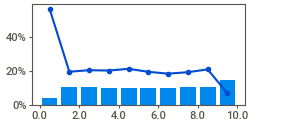
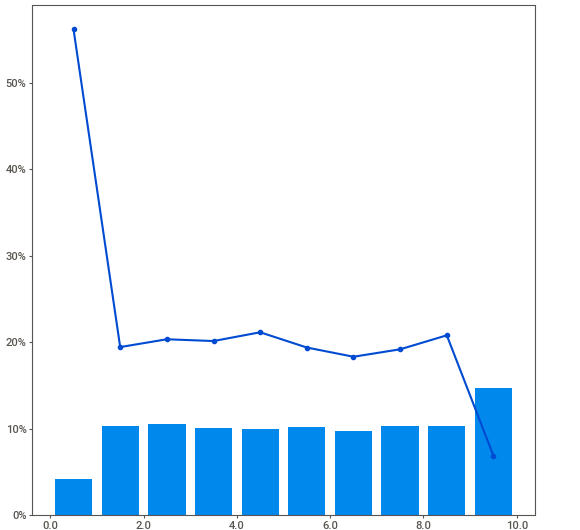
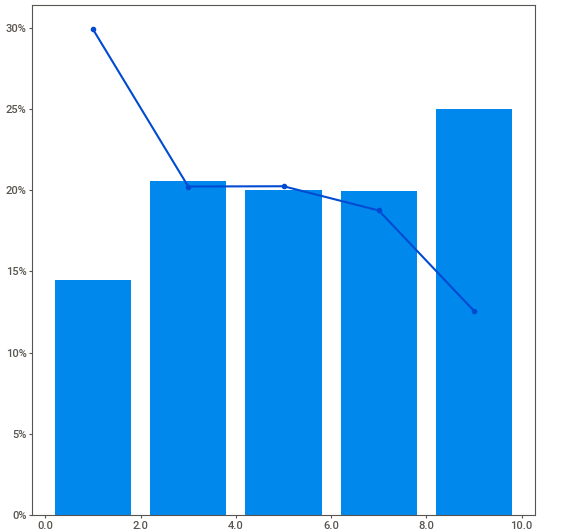
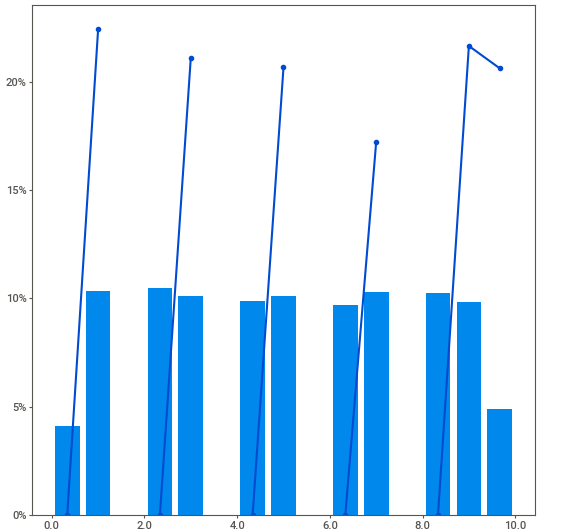
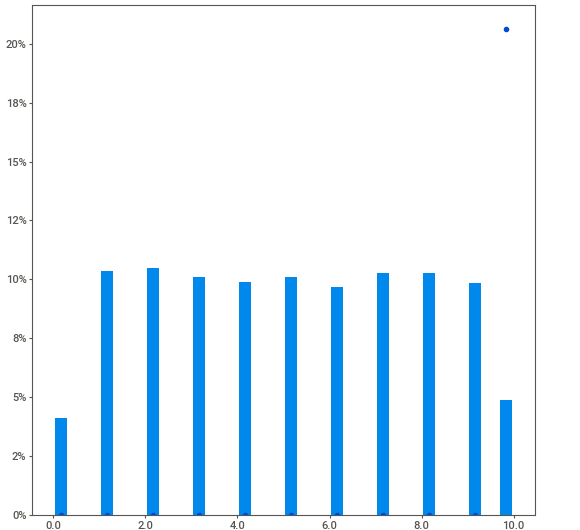
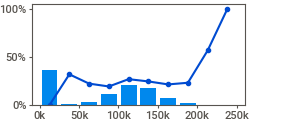
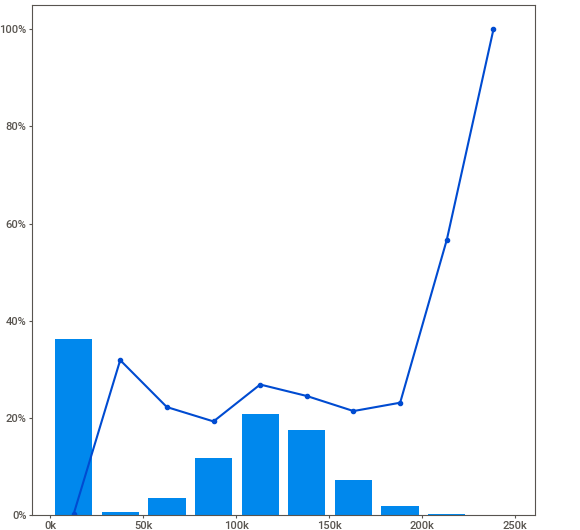
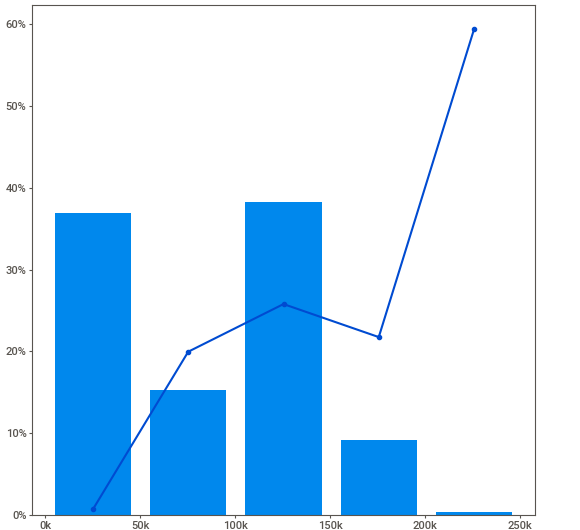
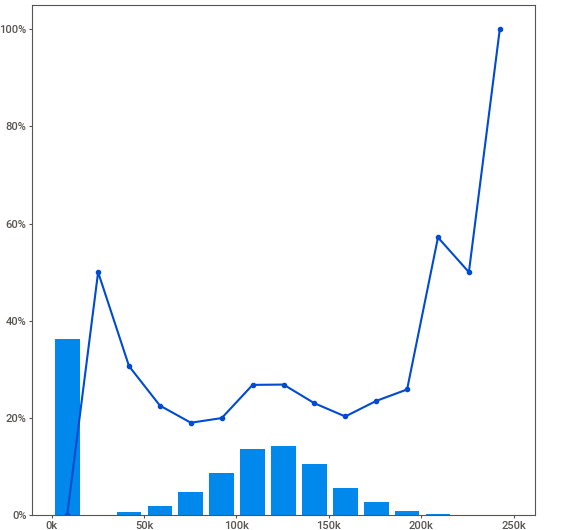
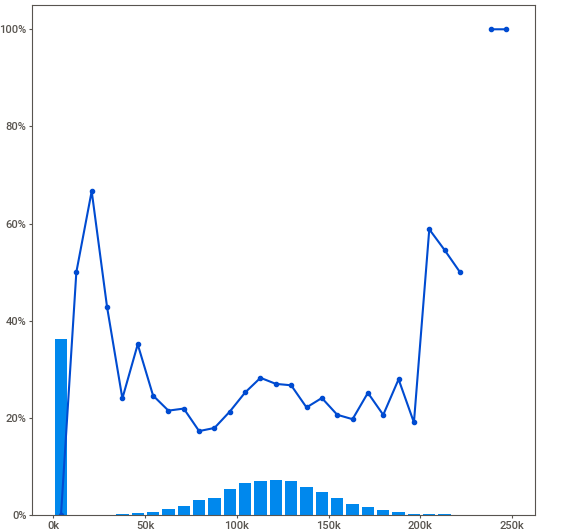
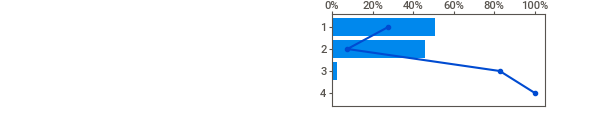
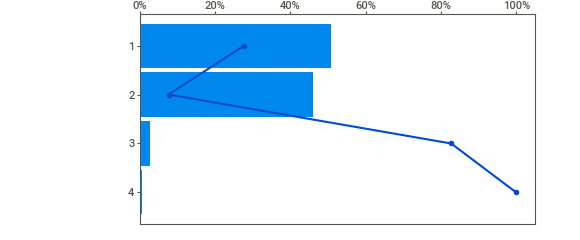
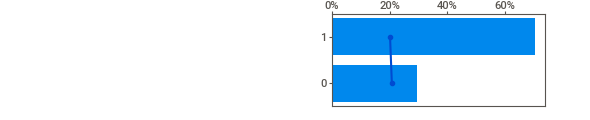
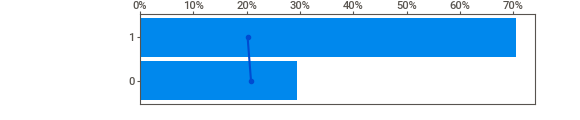
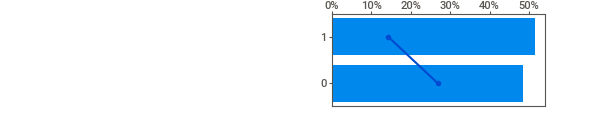
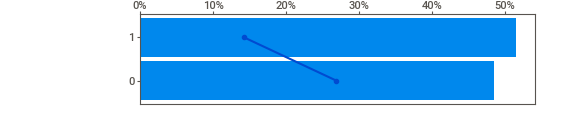
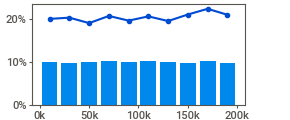
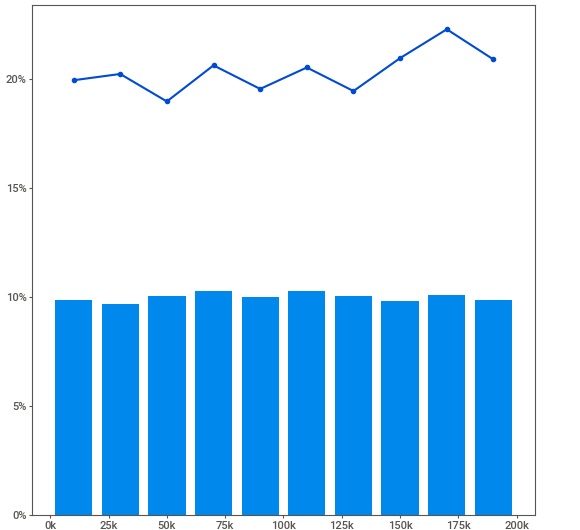
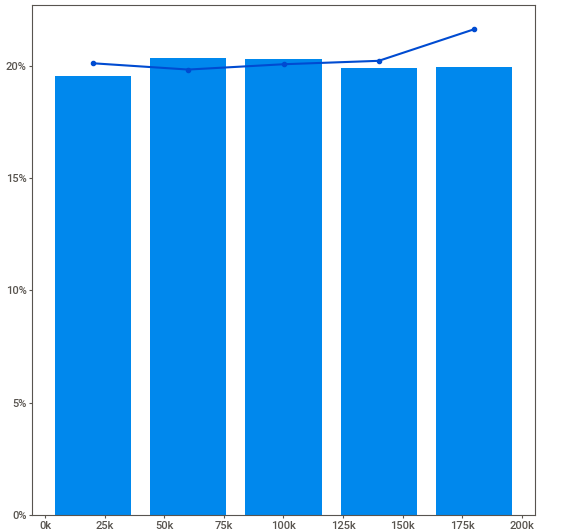
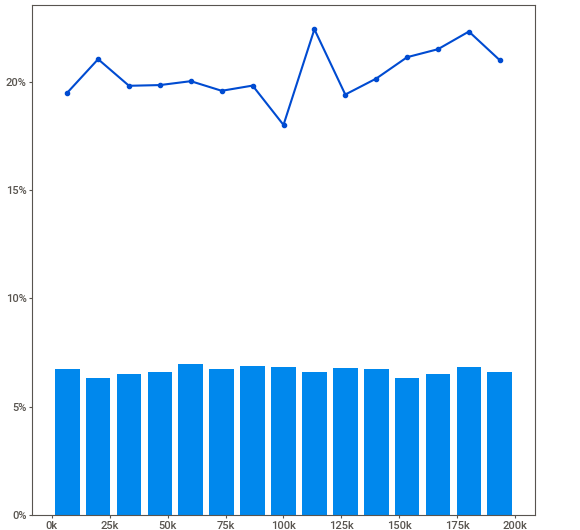
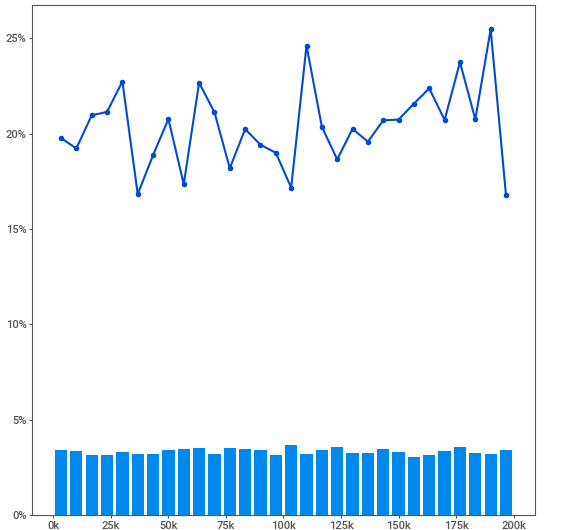
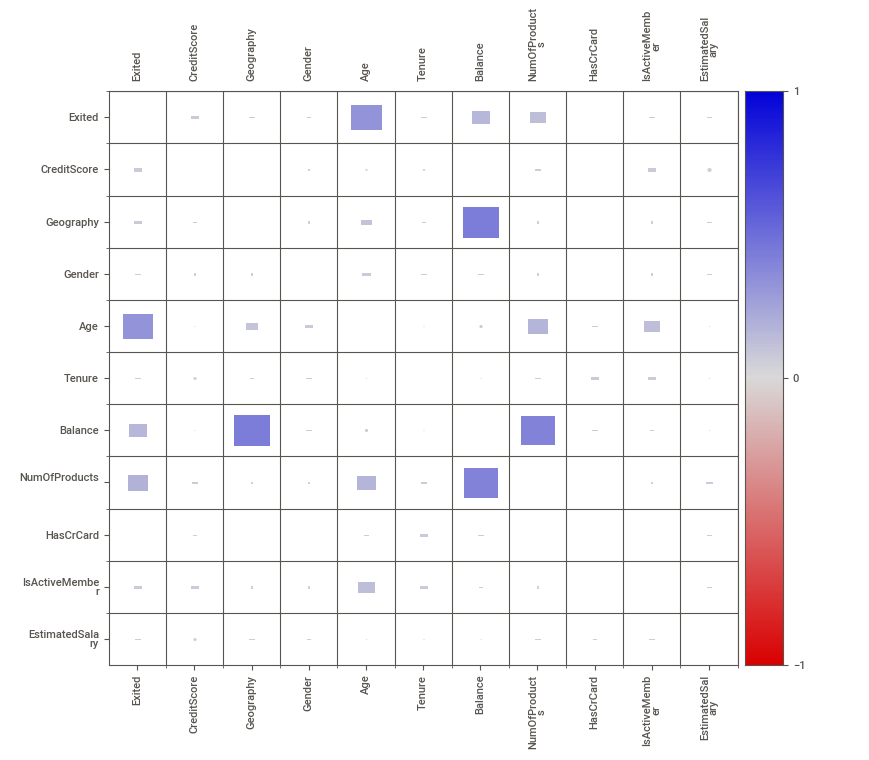
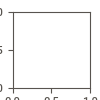

In [10]:
#Analise exploratória com Sweetviz
import sweetviz as sv
eda = sv.analyze(source = df, target_feat = 'Exited')
eda.show_notebook()

* **Qual a proporção de Churn?**

In [11]:
# configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'
# definindo cores do gráfico em sistema hexadecimal
CINZA1, CINZA2= "#CFCDCE", "#A2A1A3"
AZUL1, AZUL2 = "#8db7eb", "#253760"

In [12]:
# valors e labels para o gráfico.
lista = (df.Exited.value_counts()/df.shape[0] * 100).round(2)
labels = ['Normal','Churn']
x = np.arange(len(labels)) 

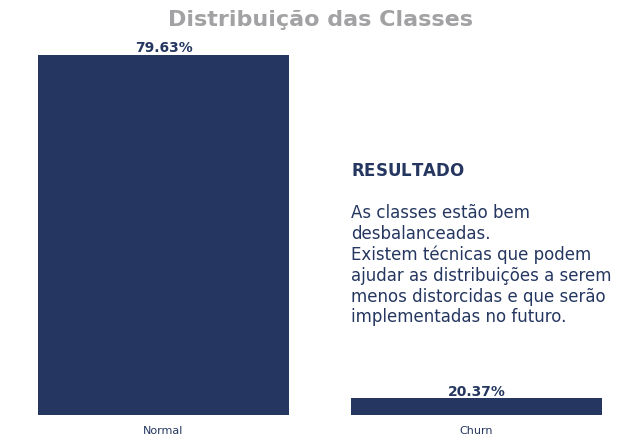

In [13]:
# criando uma figura para grafico de barras
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x, lista,color=AZUL2,log=True)
ax.set_title('Distribuição das Classes',
             fontsize=16, color=CINZA2,
             verticalalignment='bottom',
             weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels,color=AZUL2)
# removendo grids e eixos (linhas)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# removendo eixo y
plt.gca().axes.get_yaxis().set_visible(False)
# removendo xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True)
def autolabel(rects):
    for rect in rects:                                                   
        height = rect.get_height()                                       
        ax.annotate(                                                     
                    '{}%'.format(height),                                
                    xy=(rect.get_x() + rect.get_width(),  height),     
                    xytext=(-90, 0),  # offset                           
                    textcoords="offset points",                         
                    ha='center',                                        
                    va='bottom',                                         
                    fontsize=10,                                         
                    color=AZUL2,
                    weight='bold'
                    )
        
# plotando anotações do resultado da análise
plt.text(0.6, 25,
         "$\\bf{RESULTADO}$\n\n"
         "As classes estão bem\n"
         "desbalanceadas.\n"
         "Existem técnicas que podem\n"
         "ajudar as distribuições a serem\n"
         "menos distorcidas e que serão\n"
         "implementadas no futuro.\n"
         ,
         verticalalignment="bottom",
         fontsize=12,
         color=AZUL2)
        
# plotando labels acima das barras com a função
autolabel(rects1)
# salvando o gráfico
plt.savefig('bar_orig_churn.png',format='png')
plt.plot();

## **Análise Exploratória**

* **Muitos clientes não possuem saldo em conta, será que utilizam somente cartão de crédido?**

In [14]:
#porcentagem de clientes sem saldo que possuem cartão de crédito 
df_bal_0 = df.query('Balance == 0')
(df_bal_0['HasCrCard'].value_counts() / len(df_bal_0) * 100).round(2)

1    71.66
0    28.34
Name: HasCrCard, dtype: float64

* **Confirmado, cerca de 72% dos clientes que não possuem saldo em conta, possuem cartão de crédito.**
* **Qual a porcentagem de churn desses clientes?**

In [15]:
#porcentagem de clientes sem saldo em conta que deram Churn.
(df_bal_0['Exited'].value_counts() / len(df_bal_0) * 100).round(2)

0    86.18
1    13.82
Name: Exited, dtype: float64

* **De todos os clientes que não possuem saldo, obtivemos uma taxa aproximada de 14% de Churn. Inferior aos 20% da base toda.**
* **Qual a porcentagem de Churn para os clientes que possuem algum saldo em conta?**

In [17]:
df_bal_1 = df.query('Balance > 0')
(df_bal_1['Exited'].value_counts() / len(df_bal_1) * 100).round(2)

0    75.92
1    24.08
Name: Exited, dtype: float64

* **Clientes que possuem algum saldo em conta, possuem uma propensão aproximada de 24% de Churn.**

## 13/06 - Análise Exploratória.

In [18]:
#Descrição dos clientes que não possuem saldo em conta.
df_bal_0.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,3617.000000,3617.000000,3617.000000,3617.0,3617.000000,3617.000000,3617.000000
mean,649.452861,38.434891,5.071330,0.0,1.784628,98983.559549,0.138236
std,96.158798,10.492002,2.860781,0.0,0.496455,57730.828955,0.345195
min,350.000000,18.000000,0.000000,0.0,1.000000,90.070000,0.000000
25%,583.000000,31.000000,3.000000,0.0,1.000000,49506.820000,0.000000
50%,651.000000,37.000000,5.000000,0.0,2.000000,98618.790000,0.000000
75%,717.000000,43.000000,7.000000,0.0,2.000000,148330.970000,0.000000
max,850.000000,88.000000,10.000000,0.0,4.000000,199992.480000,1.000000


In [19]:
#Descrição dos clientes que possuem saldo em conta.
df_bal_1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,651.138493,39.197713,4.979633,119827.493793,1.386025,100717.352956,0.240796
std,96.934609,10.476208,2.909514,30095.056462,0.577011,57380.316584,0.427600
min,350.000000,18.000000,0.000000,3768.690000,1.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,100181.975000,1.000000,51736.850000,0.000000
50%,652.000000,38.000000,5.000000,119839.690000,1.000000,101139.300000,0.000000
75%,718.000000,44.000000,8.000000,139512.290000,2.000000,149596.615000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199970.740000,1.000000


In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
#Apenas para um melhor entendimento, será realizada a transformação dos booleanos
df["HasCrCard"] = df["HasCrCard"].map({ 0 : 'Não', 1 : 'Sim'})
df["IsActiveMember"] = df["IsActiveMember"].map({ 0 : 'Não', 1 : 'Sim'})
df["Exited"] = df["Exited"].map({ 0 : 'Não', 1 : 'Sim'})

In [22]:
#porcentagem de clientes por país.
df['Geography'].value_counts(normalize=True).round(2)

France     0.50
Germany    0.25
Spain      0.25
Name: Geography, dtype: float64

In [23]:
#Porcentagem por sexo.
df['Gender'].value_counts(normalize=True).round(2)

Male      0.55
Female    0.45
Name: Gender, dtype: float64

In [24]:
#Porcentagem de clientes que possuem/Não possuem cartão de crédito.
df['HasCrCard'].value_counts(normalize=True).round(2)

Sim    0.71
Não    0.29
Name: HasCrCard, dtype: float64

In [25]:
#Porcentagem de clientes ativos/não ativos.
df['IsActiveMember'].value_counts(normalize=True).round(2)

Sim    0.52
Não    0.48
Name: IsActiveMember, dtype: float64

In [26]:
#informações descritivas.
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


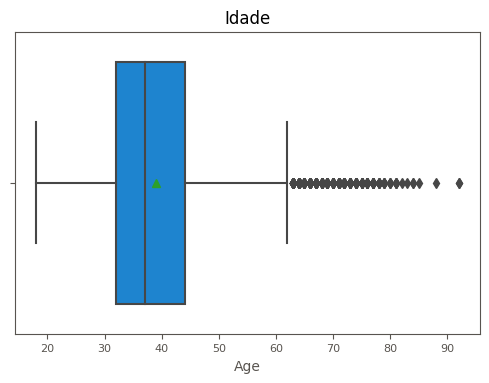

In [27]:
# boxplot com indicador da média para comparação com a mediana e visualização dos outliers.
sns.boxplot(df['Age'], showmeans=True).set_title('Idade');

### Será que estamos perdendo mais clientes de algum País em específico?

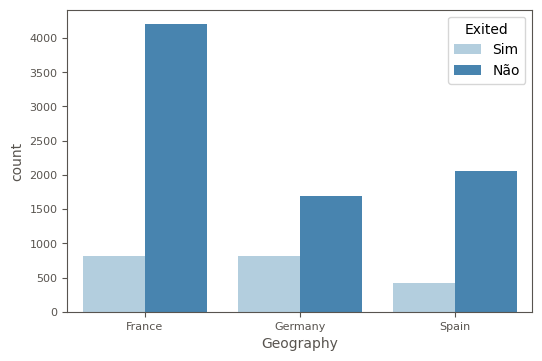

In [28]:
sns.countplot(df['Geography'], hue=df.Exited, palette='Blues');

* A França possui o menor número de abandono, apesar possuir 50% de todos os clientes do banco.
* Algo de errado com o banco da Alemanhã, pois cerca de metade dos clientes tendem a deixar os serviços do banco.

### Será que a idade pode influenciar na perda de clientes?

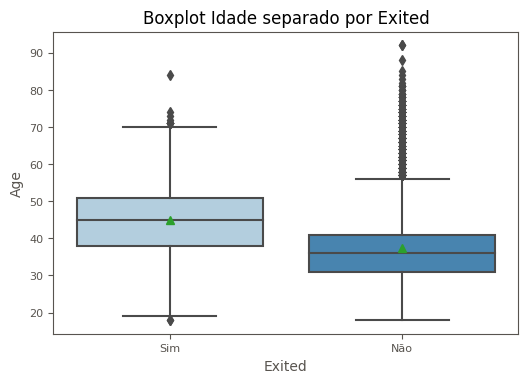

In [30]:
sns.boxplot(data=df, x="Exited", y="Age", showmeans=True,palette='Blues').set_title('Boxplot Idade separado por Exited');

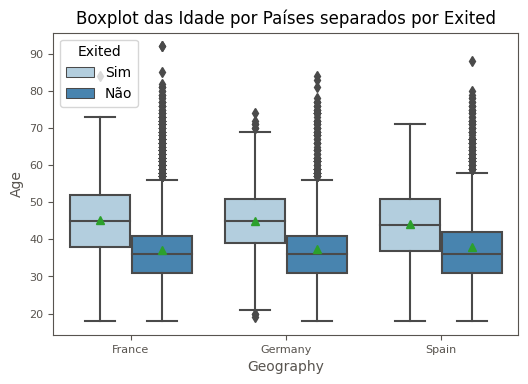

In [31]:
sns.boxplot(x="Geography", y="Age", hue="Exited", showmeans=True, data=df, palette='Blues').set_title('Boxplot das Idade por Países separados por Exited');

In [34]:
#Porcentagens de Churn dos clientes com saldo em conta, e com idade maior ou igual a 43 anos. 
df.query('Balance > 0 and Age >= 43')['Exited'].value_counts(normalize=True)

Não    0.531443
Sim    0.468557
Name: Exited, dtype: float64

In [35]:
#Porcentagem de clientes com saldo igual a 0 e idade menor do que 43 anos separados por Churn.
df.query('Balance == 0 and Age < 43')['Exited'].value_counts(normalize=True)

Não    0.923395
Sim    0.076605
Name: Exited, dtype: float64

In [36]:
#quantidade de clientes separados por Churn.
df['Exited'].value_counts()

Não    7963
Sim    2037
Name: Exited, dtype: int64

### Perfil dos Clientes

*	**Clientes com CreditScore abaixo de 400 possui uma probabilidade muito maior de Churn, chegando acima dos 60% de chance, em alguns casos.**
*	**50% são da França, 25% Alemanha e outros 25% da Espanha.**
*	**A Alemanha, possui uma taxa de Churn de pelo menos 2 vezes maior que os demais países, certamente há algum problema nessa região.**
*	**Mulheres tem 10% há mais do que os homens em propensão ao Churn.**
*	**55% são do sexo Masculino.**
*	**A idade dos clientes varia de 18 à 92 anos, com média de 39 e 75% possuem idade até 44 anos.**
*	**Clientes com 45 até 65 anos, tem uma maior propensão ao Churn que os demais.**
*	**Temos cerca de 4.1% do total, de clientes com menos de 1 anos de casa (Tenure). Desses clientes a probabilidade de Churn é muito maior.**
*	**Já para os clientes com 9 até 10 anos de casa (Tenure), possuem uma porcentagem muito menor de Churn.**
*	**Clientes com Saldo em conta (Balance), acima dos 200mil Euros possuem probabilidade maior ao Churn. Será que os concorrentes estão fornecendo algum produto melhor para esses clientes migrarem de banco?**
*	**Clientes sem saldo em conta (Balance), tem probabilidade quase zero em dar Churn. Precisamos analisar melhor, pois esses clientes representam +- 36% de toda base.**
*	**Já os clientes com saldo de 10mil a 50mil (Balance), possuem uma alta taxa de Churn.**
*	**Clientes com 2 produtos (NumOfProducts), são os menos propensos ao Churn. Cerca de 46% de toda a base.**
*	**Clientes com 3 e 4 produtos (NumOfProducts), são possuem mais de 80% de propensão ao Churn. Esses clientes representam cerca de 4% de toda base.** 
*	**Possuir ou não um cartão de crédito, aparentemente não é um indicativo relevante, pois ambos possuem taxas similares que giram em tordo de 20%.**
*	**52% é membro ativo.**
*	**Cliente que são membros ativos (IsActiveMember), possuem quase 2 vezes, menos chance de Churn. O que caracteriza um cliente ativo?** 
*	**Clientes com salário estimado (EstimatedSalary) maior que 150mil, possuem uma probabilidade um pouco maior de Churn.**

## 14/06 - Continuação - Análise exploratória

In [37]:
#convertendo novamente para o tipo inteiro
df["Exited"] = df["Exited"].map({ 'Não':0, 'Sim':1}).astype('int64')

In [38]:
#Função para tirar a média de churn pela variável em questão e plotar um grafico de distribuição com a média e uma projeção de 10%.
def media_by_churn(list_col, var_churn):
    pd.set_option('display.max_rows', None)
    for i in list_col:
        media = df[[i,var_churn]].groupby([i]).mean().round(2).reset_index()
        print(f'Media de Churn por {i}:\n')
        print(media,'\n')
        print('--'*15)
        #Plotando um gráfico para visualizar a distribuição de churn por idade.
        plt.figure(figsize=(12,4))
        plt.axhline(media[var_churn].mean()+.1,0,1)
        plt.axhline(media[var_churn].mean(),0,1,color='r',**{'ls':'--'})
        ax = sns.barplot(x= i,y=var_churn,data=media, palette='ocean_r')
        plt.xticks(rotation=45)
        plt.title(f'Distribuição de Churn por {i}')
        plt.show()
        print('**'*20)
        
    pd.set_option('display.max_rows', 10)

In [39]:
#lista das colunas para comparar as médias de churn
colunas = ['Geography', 'Gender', 'Age', 'Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember']
#Variável Churn
churn = 'Exited'

Media de Churn por Geography:

  Geography  Exited
0    France    0.16
1   Germany    0.32
2     Spain    0.17 

------------------------------


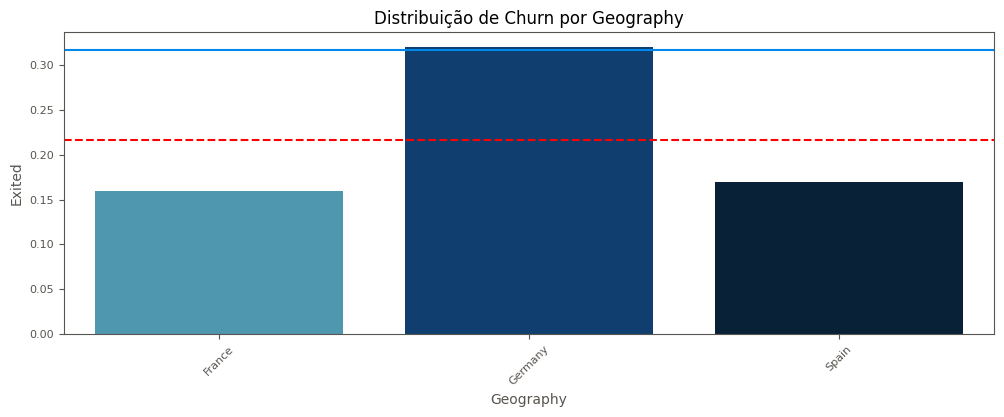

****************************************
Media de Churn por Gender:

   Gender  Exited
0  Female    0.25
1    Male    0.16 

------------------------------


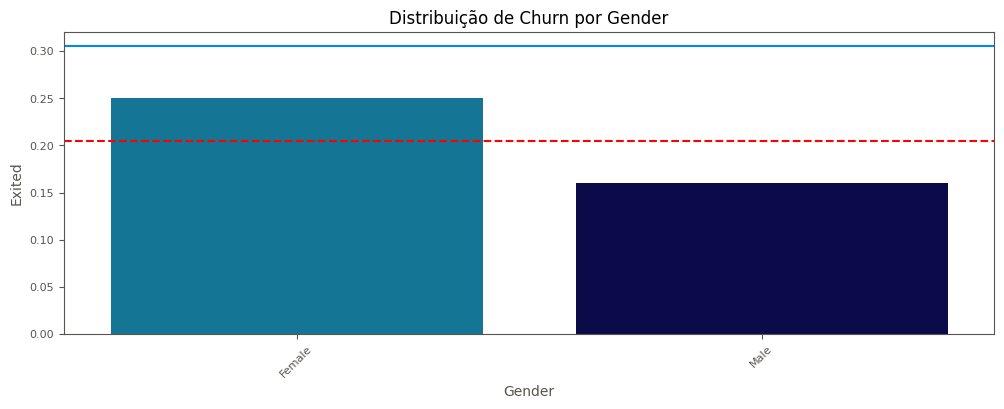

****************************************
Media de Churn por Age:

    Age  Exited
0    18    0.09
1    19    0.04
2    20    0.05
3    21    0.06
4    22    0.14
5    23    0.06
6    24    0.11
7    25    0.04
8    26    0.07
9    27    0.06
10   28    0.08
11   29    0.08
12   30    0.07
13   31    0.08
14   32    0.08
15   33    0.10
16   34    0.07
17   35    0.12
18   36    0.12
19   37    0.13
20   38    0.13
21   39    0.17
22   40    0.21
23   41    0.19
24   42    0.24
25   43    0.30
26   44    0.28
27   45    0.38
28   46    0.40
29   47    0.44
30   48    0.48
31   49    0.51
32   50    0.53
33   51    0.55
34   52    0.63
35   53    0.54
36   54    0.61
37   55    0.59
38   56    0.71
39   57    0.51
40   58    0.43
41   59    0.48
42   60    0.52
43   61    0.40
44   62    0.40
45   63    0.45
46   64    0.32
47   65    0.44
48   66    0.20
49   67    0.14
50   68    0.32
51   69    0.09
52   70    0.22
53   71    0.26
54   72    0.05
55   73    0.08
56   74    0.06
57   7

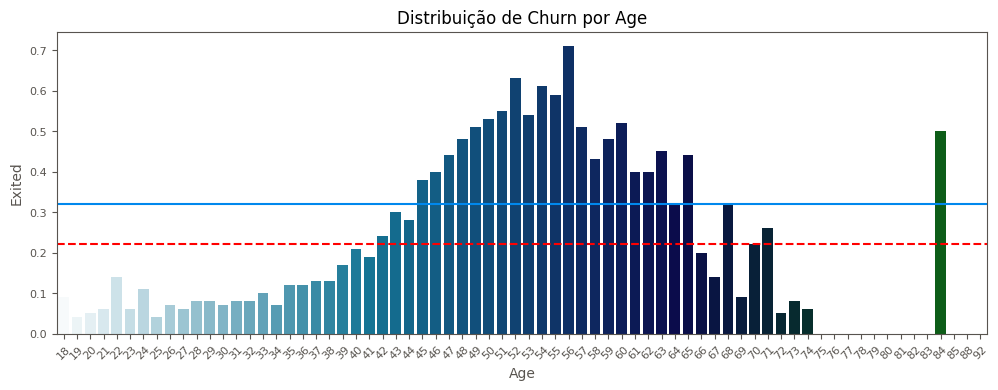

****************************************
Media de Churn por Tenure:

    Tenure  Exited
0        0    0.23
1        1    0.22
2        2    0.19
3        3    0.21
4        4    0.21
5        5    0.21
6        6    0.20
7        7    0.17
8        8    0.19
9        9    0.22
10      10    0.21 

------------------------------


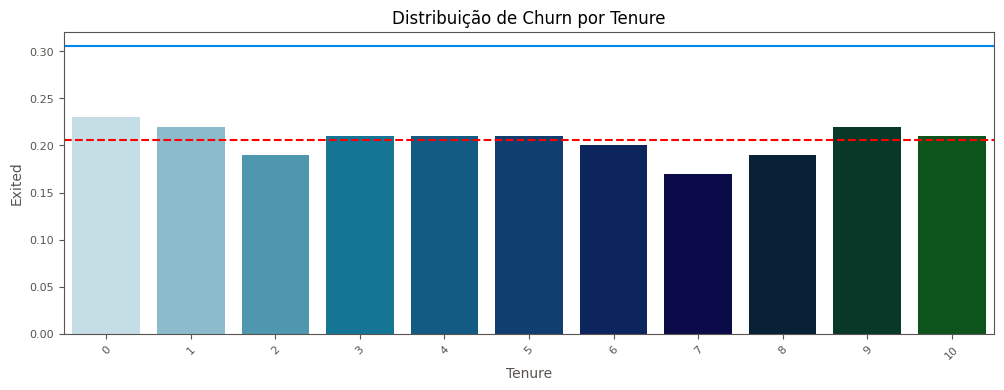

****************************************
Media de Churn por NumOfProducts:

   NumOfProducts  Exited
0              1    0.28
1              2    0.08
2              3    0.83
3              4    1.00 

------------------------------


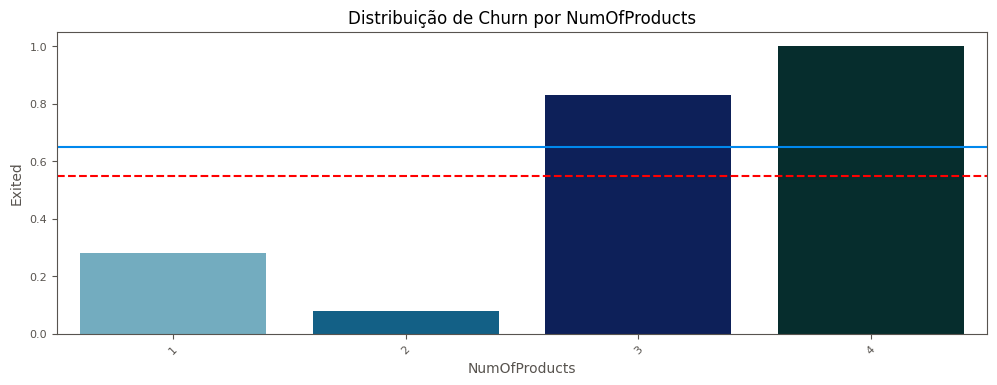

****************************************
Media de Churn por HasCrCard:

  HasCrCard  Exited
0       Não    0.21
1       Sim    0.20 

------------------------------


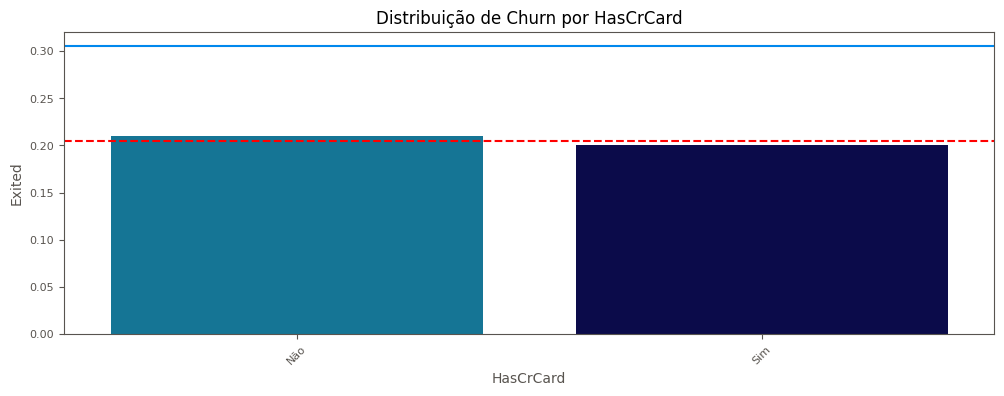

****************************************
Media de Churn por IsActiveMember:

  IsActiveMember  Exited
0            Não    0.27
1            Sim    0.14 

------------------------------


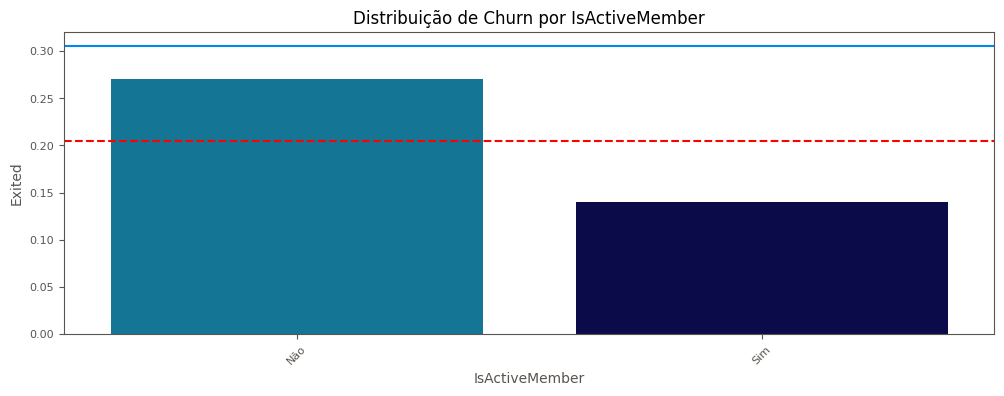

****************************************


In [40]:
#Verificando a média de churn das variáveis selecionadas.
media_by_churn(colunas,churn)

* **Pelo gráfico acima, podemos concluir que os clientes que possuem idade entre 45 e 65 anos possuem uma propenção ao Churn, acima da média dos demais clientes.** 
* **Aparentemente a variável Tenure não possui muita importância, nesse caso tempo de casa apresenta basicamente a mesmpo proporção de churn.**
* **Conforme o EDA, clientes com 3 e 4 produtos possuem mais de 80% de propensão ao Churn e clientes que possuem apenas 1 produto possuem baixa probabilidade, cerca de 8%.**
* **Aparentemente, a variável HasCrCard não possui muita importância para contribuir com o modelo, pois tanto os clientes que possuem cartão de crédito, quanto os que não possuem, estão com as médias basicamente similares.**
* **Clientes que não são membros ativos(IsActiveMember) possuem quase o dobro de propensão ao churn.**